In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score, homogeneity_score, completeness_score
from sklearn.decomposition import PCA

Loading data

In [1]:
#score de silhueta

In [4]:
#ld=2

ld2_ligsio2 = np.load('ld2_ligsio2_all.npy')
ld2_ligcl = np.load('ld2_ligcl_all.npy')
ld2_ausio2 = np.load('ld2_ausio2_all.npy')
ld2_auau = np.load('ld2_auau_all.npy')

Stacking the data together and labeling the datasets

In [5]:
ld2 = np.concatenate([ld2_ligsio2, ld2_ligcl, ld2_ausio2, ld2_auau], axis=0)

ld2_labels = (
    ['ligsio2'] * len(ld2_ligsio2) +
    ['ligcl']   * len(ld2_ligcl) +
    ['ausio2']  * len(ld2_ausio2) +
    ['auau']    * len(ld2_auau)
)

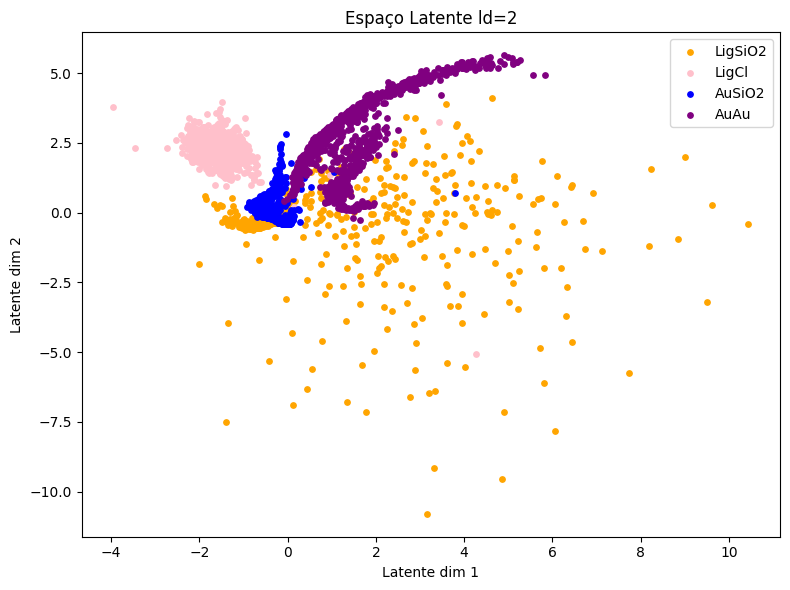

In [6]:
cores = ['orange', 'pink', 'blue', 'purple']
labels = ['LigSiO2', 'LigCl', 'AuSiO2', 'AuAu']

plt.figure(figsize=(8, 6))
start = 0
for i, (data, label, color) in enumerate(zip(
    [ld2_ligsio2, ld2_ligcl, ld2_ausio2, ld2_auau],
    labels,
    cores
)):
    plt.scatter(data[:, 0], data[:, 1], label=label, s=15, color=color)
plt.legend()
plt.title("Espaço Latente ld=2")
plt.xlabel("Latente dim 1")
plt.ylabel("Latente dim 2")
plt.tight_layout()
plt.show()

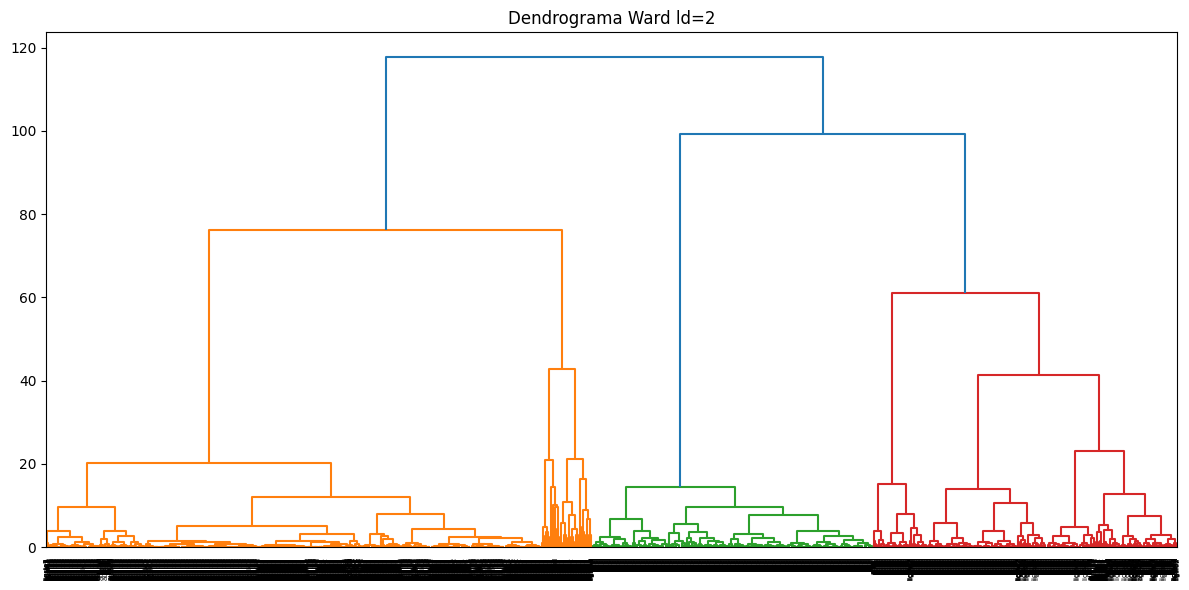

In [7]:
linked = linkage(ld2, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=ld2_labels, leaf_rotation=90)
plt.title('Dendrograma Ward ld=2')
plt.tight_layout()
plt.show()

cluster_labels = fcluster(linked, t=4, criterion='maxclust')

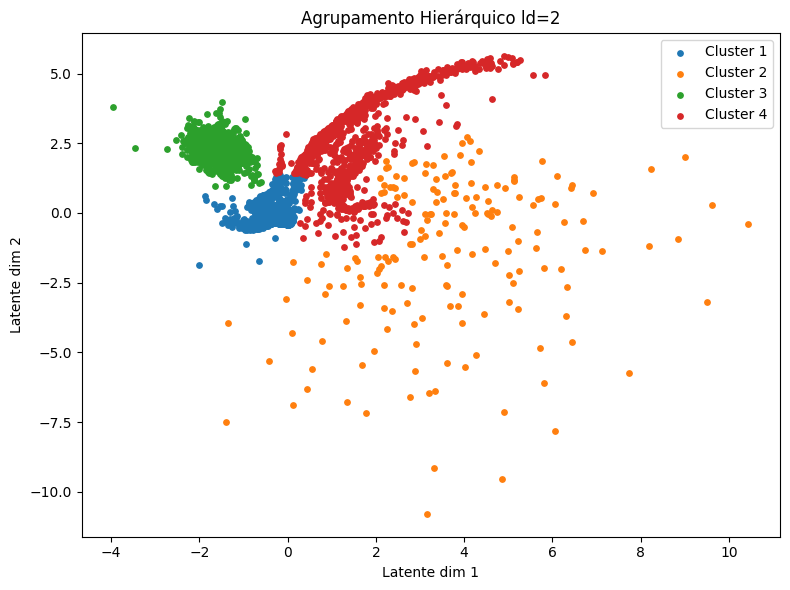

In [8]:
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    mask = cluster_labels == cluster_id
    plt.scatter(ld2[mask, 0], ld2[mask, 1], label=f"Cluster {cluster_id}", s=15)
plt.legend()
plt.title("Agrupamento Hierárquico ld=2")
plt.xlabel("Latente dim 1")
plt.ylabel("Latente dim 2")
plt.tight_layout()
plt.show()

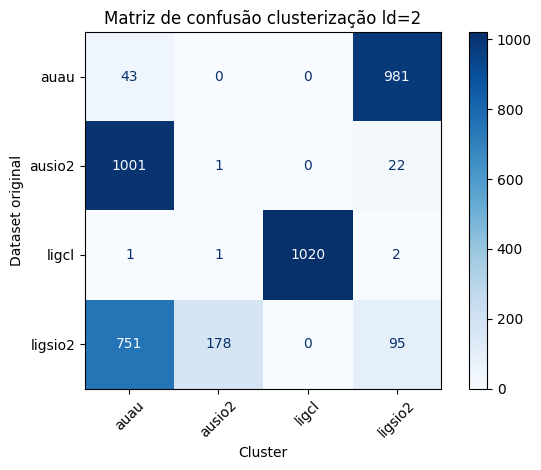

In [9]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(ld2_labels)

cluster_encoder = LabelEncoder()
cluster_labels_num = cluster_encoder.fit_transform(cluster_labels)

cm = confusion_matrix(y_true_encoded, cluster_labels_num)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de confusão clusterização ld=2")
plt.ylabel("Dataset original")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()

In [10]:
ari = adjusted_rand_score(y_true_encoded, cluster_labels)
hom = homogeneity_score(y_true_encoded, cluster_labels)
comp = completeness_score(y_true_encoded, cluster_labels)

print(f"Ajusted Rand Index (ARI): {ari:.3f}")
print(f"Homogeneidade: {hom:.3f}")
print(f"Completude: {comp:.3f}")

Ajusted Rand Index (ARI): 0.643
Homogeneidade: 0.672
Completude: 0.777


Para o espaço latente ld=10

In [11]:
#ld=10

ld10_ligsio2 = np.load('ld10_ligsio2_all.npy')
ld10_ligcl = np.load('ld10_ligcl_all.npy')
ld10_ausio2 = np.load('ld10_ausio2_all.npy')
ld10_auau = np.load('ld10_auau_all.npy')

In [12]:
ld10 = np.concatenate([ld10_ligsio2, ld10_ligcl, ld10_ausio2, ld10_auau], axis=0)

labels_true_10 = (
    ['ligsio2'] * len(ld10_ligsio2) +
    ['ligcl']   * len(ld10_ligcl) +
    ['ausio2']  * len(ld10_ausio2) +
    ['auau']    * len(ld10_auau)
)

In [13]:
label_encoder_10 = LabelEncoder()
y_true_10 = label_encoder_10.fit_transform(labels_true_10)
label_names_10 = label_encoder_10.classes_

Z10 = linkage(ld10, method='ward')
cluster_labels_10 = fcluster(Z10, t=4, criterion='maxclust')

In [14]:
pca_10 = PCA(n_components=2)
X10_pca = pca_10.fit_transform(ld10)

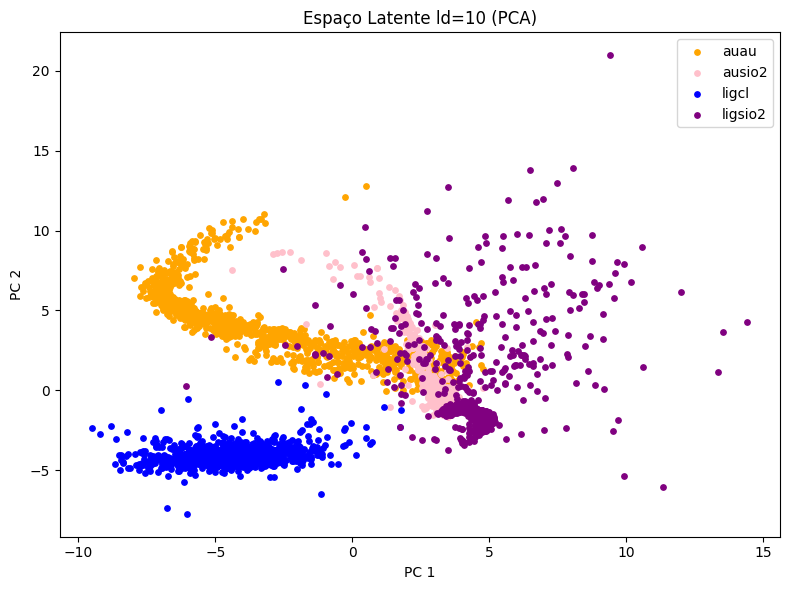

In [15]:
colors = ['orange', 'pink', 'blue', 'purple']
label_to_color = dict(zip(label_names_10, colors))

plt.figure(figsize=(8, 6))
for label in label_names_10:
    mask = np.array(labels_true_10) == label
    plt.scatter(X10_pca[mask, 0], X10_pca[mask, 1], label=label, s=15, color=label_to_color[label])
plt.legend()
plt.title("Espaço Latente ld=10 (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.tight_layout()
plt.show()

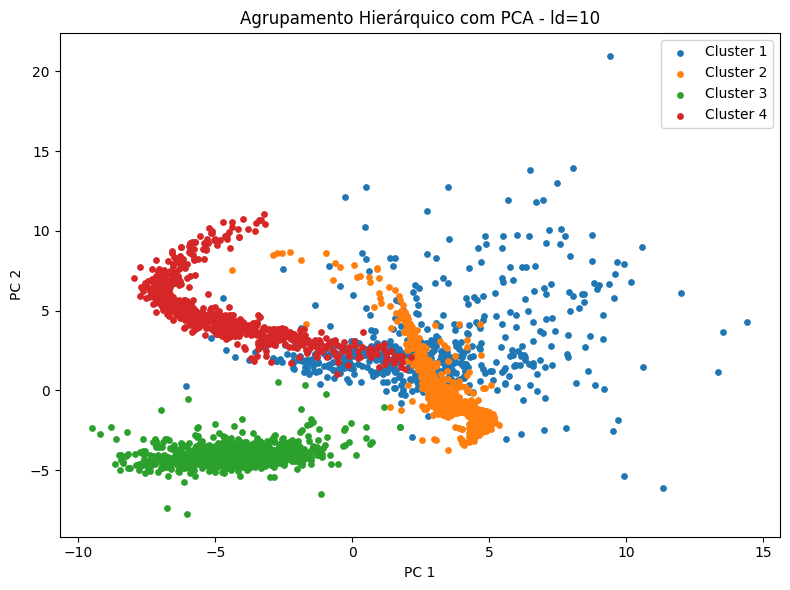

In [16]:
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels_10):
    mask = cluster_labels_10 == cluster_id
    plt.scatter(X10_pca[mask, 0], X10_pca[mask, 1], label=f"Cluster {cluster_id}", s=15)
plt.legend()
plt.title("Agrupamento Hierárquico com PCA - ld=10")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.tight_layout()
plt.show()

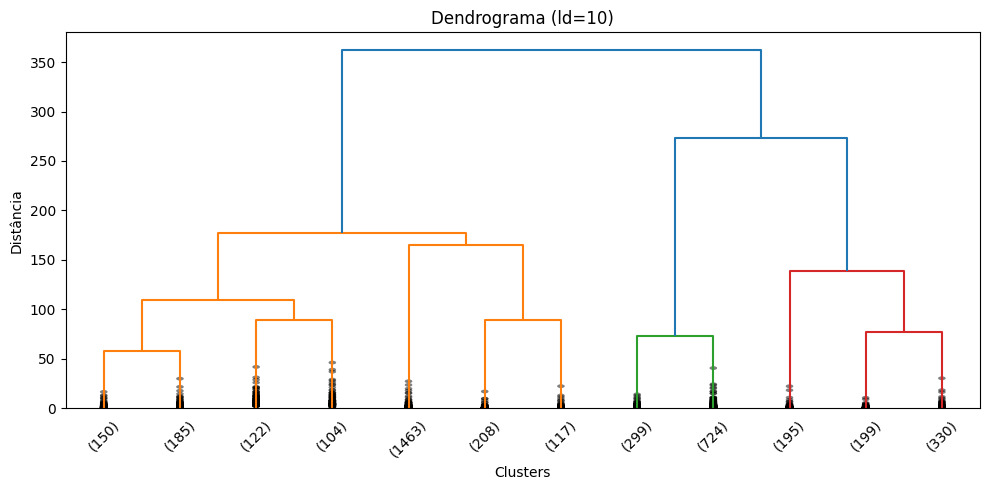

In [17]:
plt.figure(figsize=(10, 5))
dendrogram(Z10, truncate_mode="lastp", p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma (ld=10)")
plt.xlabel("Clusters")
plt.ylabel("Distância")
plt.tight_layout()
plt.show()

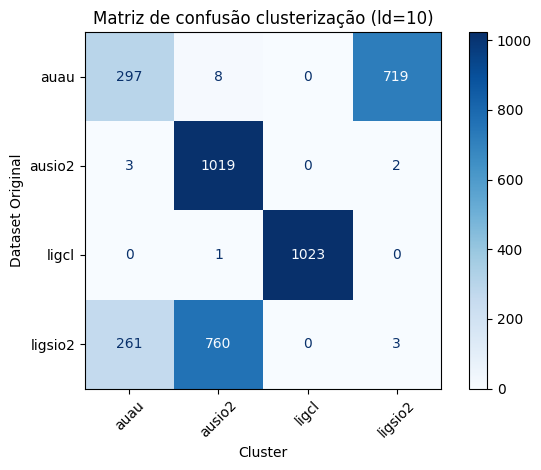

In [18]:
cluster_encoder = LabelEncoder()
cluster_labels_num = cluster_encoder.fit_transform(cluster_labels_10)

cm = confusion_matrix(y_true_10, cluster_labels_num)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names_10)
disp.plot(cmap='Blues', xticks_rotation=45)

plt.title("Matriz de confusão clusterização (ld=10)")
plt.ylabel("Dataset Original")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()

In [19]:
ari_10 = adjusted_rand_score(y_true_10, cluster_labels_10)
homogeneity_10 = homogeneity_score(y_true_10, cluster_labels_10)
completeness_10 = completeness_score(y_true_10, cluster_labels_10)

print("Adjusted Rand Index (ARI):", ari_10)
print("Homogeneidade:", homogeneity_10)
print("Completude:", completeness_10)

Adjusted Rand Index (ARI): 0.6130057050992231
Homogeneidade: 0.6985955427736437
Completude: 0.7525376127172396
